In [40]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import glob

In [41]:
# Get paths to data
train_normal_paths = glob.glob("../chest-xray-original/train/NORMAL/*")
train_pneumonia_paths = glob.glob("../chest-xray-original/train/PNEUMONIA/*")

test_normal_paths = glob.glob("../chest-xray-original/test/NORMAL/*")
test_pneumonia_paths = glob.glob("../chest-xray-original/test/PNEUMONIA/*")

val_normal_paths = glob.glob("../chest-xray-original/val/NORMAL/*")
val_pneumonia_paths = glob.glob("../chest-xray-original/val/PNEUMONIA/*")

In [42]:
def read_images_from_path(images_path):
    images = []
    for image_path in images_path:
        images.append(mpimg.imread(image_path))
    return np.array(images)

# Read images from path
train_normal_images = read_images_from_path(train_normal_paths)
train_pneumonia_images = read_images_from_path(train_pneumonia_paths)
print("train_normal_images shape", train_normal_images.shape)
print("train_pneumonia_images shape", train_pneumonia_images.shape)

test_normal_images = read_images_from_path(test_normal_paths)
test_pneumonia_images = read_images_from_path(test_pneumonia_paths)
print("test_normal_images shape", test_normal_images.shape)
print("test_pneumonia_images shape", test_pneumonia_images.shape)

val_normal_images = read_images_from_path(val_normal_paths)
val_pneumonia_images = read_images_from_path(val_pneumonia_paths)
print("val_normal_images shape", val_normal_images.shape)
print("val_pneumonia_images shape", val_pneumonia_images.shape)

C:\Users\simon\AppData\Local\Temp\ipykernel_28256\1421023903.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


train_normal_images shape (1341,)
train_pneumonia_images shape (3875,)
test_normal_images shape (234,)
test_pneumonia_images shape (390,)
val_normal_images shape (8,)
val_pneumonia_images shape (8,)


Looking at the data, it is not balanced. It seems like in both train and test, the amount of normal images is different from the amount of pneumonia. This has to be balanced.
Also, it seems like the size of the images is not equal because it only lists the shape as (x, nothing). The images have to be resized to a uniform size.
When looking at the validation data, we notice that the amount of validation images is very small. Some images from the training data has to be moved over to the validation data.
Lastly, the total amount of images is too small. We will have to augment some images to create more data.



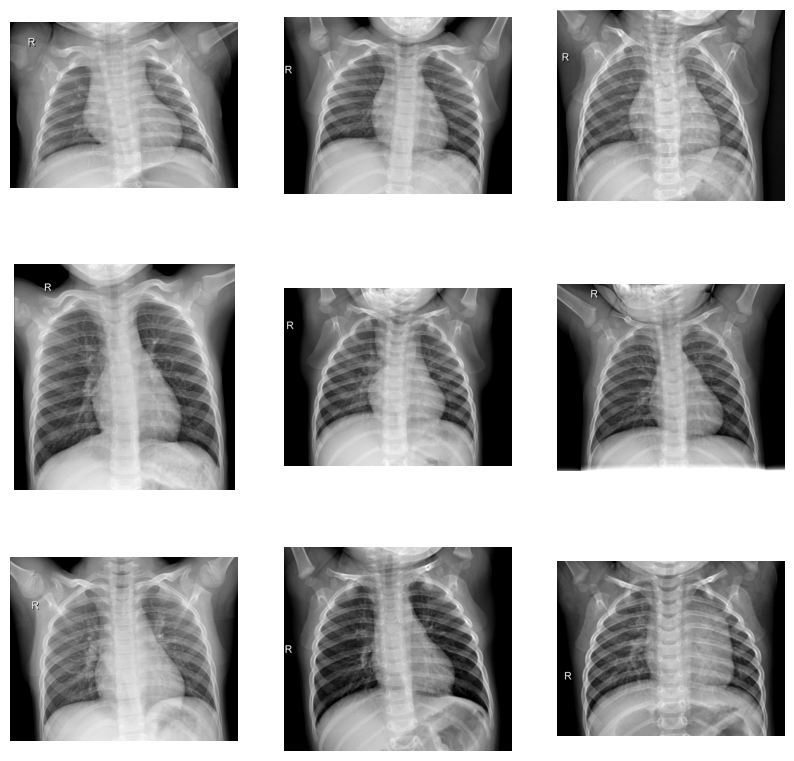

In [45]:
# Pick 9 random images from training data with normal/not sick images.
sample_images = random.choices(train_normal_images, k=9)

# Plot some normal images from training data to visualize
plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(sample_images[i], cmap="gray")
    plt.axis("off")


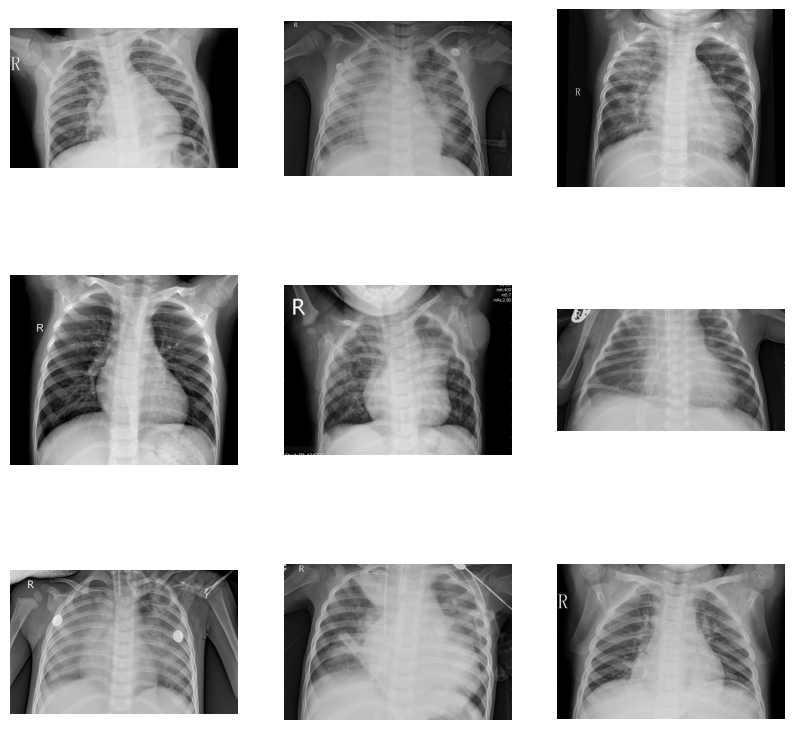

In [46]:
# Pick 9 random images from training data with pneumonia images.
sample_images = random.choices(train_pneumonia_images, k=9)

# Plot some pneumonia images from training data to visualize
plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(sample_images[i], cmap="gray")
    plt.axis("off")

As we can see from the images, the size of the images differ. The images have to be shaped to be uniform.